<a href="https://colab.research.google.com/github/Swarup899/House_price_prediction/blob/main/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving house_price_dataset.csv to house_price_dataset.csv


<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 1: Importing Libraries</h2>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 2:Loading the Dataset </h2>

In [3]:
df=pd.read_csv('house_price_dataset.csv')
df.head()

,area,bedrooms,age,price
0,2248,2,9,362819
1,1930,2,29,255051
2,2323,3,24,349582
3,2761,3,6,440879
4,1882,5,19,295406


<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 3:Exploratory Data Analysis </h2>

In [4]:
#Exploratory data analysis
print("General info:")
df.info()
print("\nSummary statistics:")
print(df.describe())
print("Shape of dataset:", df.shape)  #500 rows and 4 columns
print("Missing values:\n", df.isnull().sum())  #no missing values in any column

General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      500 non-null    int64
 1   bedrooms  500 non-null    int64
 2   age       500 non-null    int64
 3   price     500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB

Summary statistics:
              area    bedrooms         age          price
count   500.000000  500.000000  500.000000     500.000000
mean   2002.908000    2.966000   14.682000  323478.748000
std     490.617164    1.422988    8.752261   76513.637414
min     379.000000    1.000000    0.000000   91353.000000
25%    1649.500000    2.000000    7.000000  270424.750000
50%    2006.000000    3.000000   14.000000  319209.000000
75%    2317.500000    4.000000   23.000000  372270.500000
max    3926.000000    5.000000   29.000000  591101.000000
Shape of dataset: (500, 4)
Missing values:
 area        0
bedrooms    0
age   

<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 4:Define Features and Target variables </h2>

In [5]:
X = df[['area', 'bedrooms', 'age']]
y = df['price']

<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 5:Splitting the Dataset </h2>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 6:Train the Model </h2>

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 7:Make predictions </h2>

In [8]:
y_pred = model.predict(X_test)

<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 8:Model Evaluation </h2>

In [9]:
# Model Evaluation
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error (MAE): 17035.137758302502
Mean Squared Error (MSE): 461032832.66878396
R^2 Score: 0.9205531331572157


<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 9:Visualization and Graphs
 <br>
    i)Scatterplot:Actual vs predicted plot </h2>

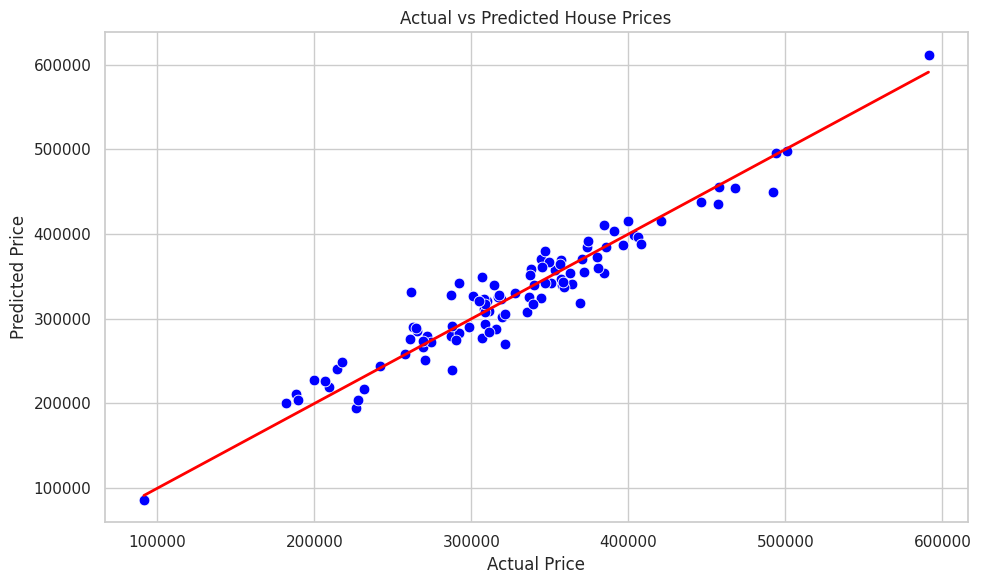

In [10]:
#Actual vs predicted plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

<h2 style="color: teal; font-family: Arial; font-size: 28px;"> ii) Pairplot </h2>

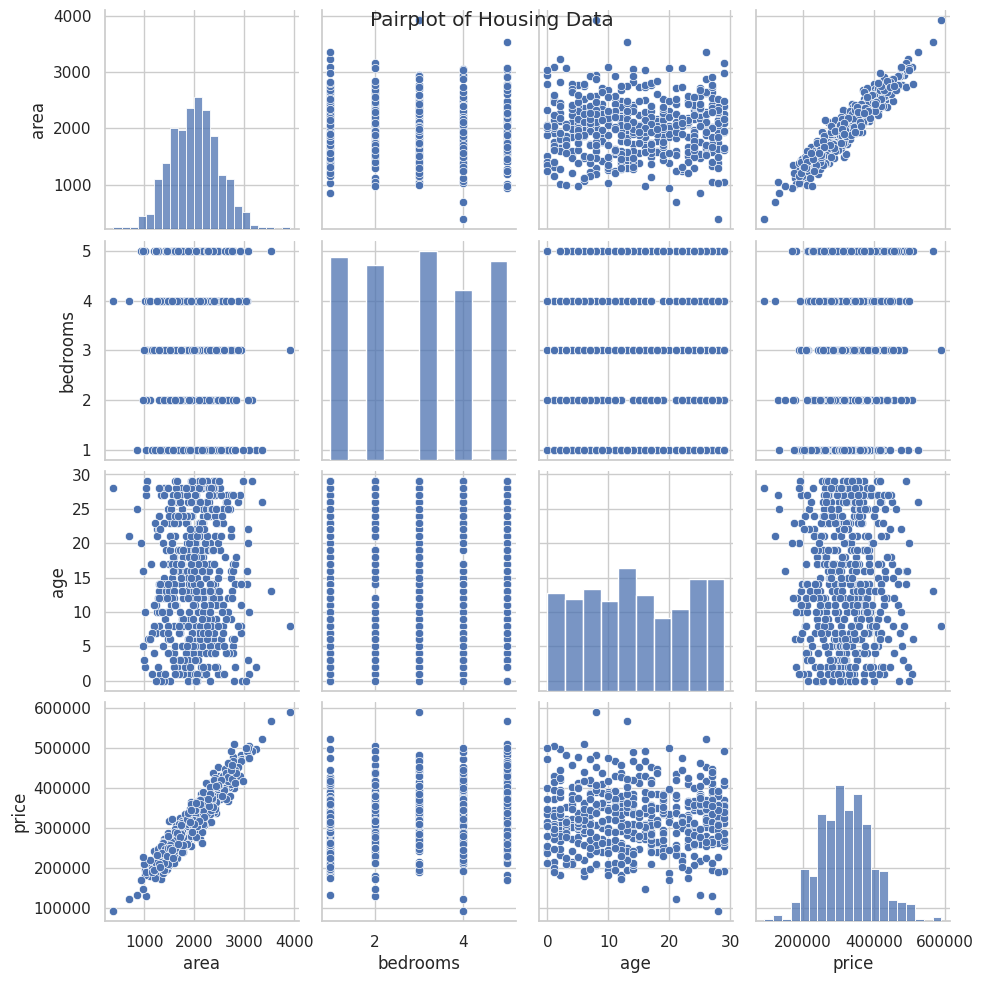

In [11]:
# Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Housing Data')
plt.show()

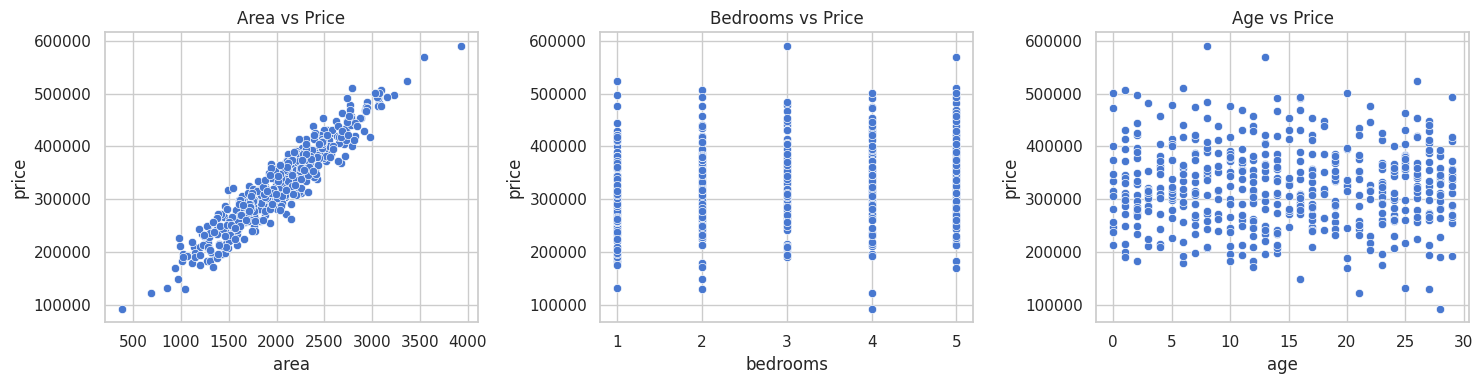

In [12]:
#relationship between features and prices
sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Bedrooms vs Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x='age', y='price', data=df)
plt.title('Age vs Price')

plt.tight_layout()
plt.show()

<h2 style="color: teal; font-family: Arial; font-size: 28px;"> iii) Correlation </h2>

In [13]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_price = correlation_matrix['price'].drop('price')
print("Correlation of each feature with price:")
print(correlation_with_price)
print("Area is the most important feature for predicting house price")

Correlation of each feature with price:
area        0.947799
bedrooms    0.179011
age        -0.025172
Name: price, dtype: float64
Area is the most important feature for predicting house price


<h2 style="color: teal; font-family: Arial; font-size: 28px;">iv) Histogram Distribution of Housing Prices </h2>

<Figure size 640x480 with 0 Axes>

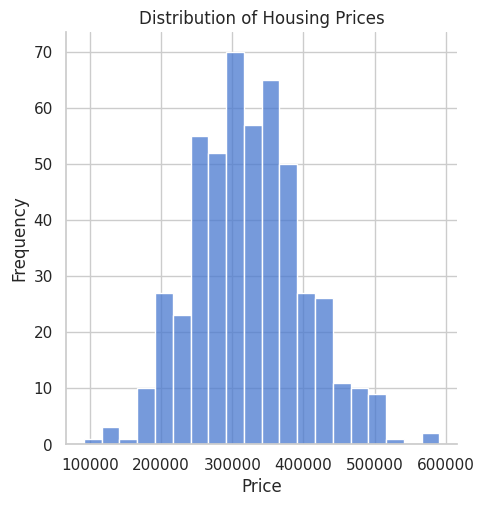

In [14]:
# Distribution of Housing Prices
plt.figure()
sns.displot(df['price'], kde=False)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<h2 style="color: teal; font-family: Arial; font-size: 28px;">v) Regression Residually plot </h2>

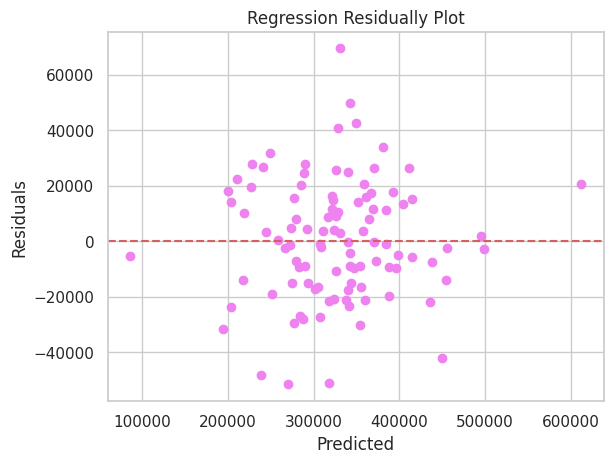

In [15]:
# Residually Plot
residuals = y_pred - y_test
plt.scatter(y_pred, residuals, color='violet')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Regression Residually Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

<h2 style="color: teal; font-family: Arial; font-size: 28px;">📚 Step 10:Predicting for a new House price </h2>

In [16]:
#prediction for a new house
new_house = pd.DataFrame([[1500, 2, 5]], columns=['area', 'bedrooms', 'age'])
predicted_price = model.predict(new_house)[0]
print("Predicted price", predicted_price)

Predicted price 244990.7644745624
